# Gradient descent implementation base on Taylor interpolation search

## Needed Libraries import

In [22]:
from helpers import *
import numpy as np
from scipy.optimize import OptimizeResult

## Gradient Descent implementations with Taylor interpolation search

### Implementation of Taylor interpolation search

In [23]:
def taylor_interpolation_search(f, a, b, tol=1e-6, max_iter=1000):
    nfev = 0
    iteration = 0
    x_min = None

    for iteration in range(max_iter):
        midpoint = (a + b) / 2
        f_mid = f(midpoint)
        f_a = f(a)
        f_b = f(b)
        nfev += 3

        numerator = (f_b - f_mid) * (midpoint - a) ** 2 - (f_mid - f_a) * (b - midpoint) ** 2
        denominator = 2 * ((f_b - f_mid) * (midpoint - a) - (f_mid - f_a) * (b - midpoint))

        if np.abs(denominator) < np.finfo(float).eps:
            x_min = midpoint
            break

        x_taylor = midpoint + numerator / denominator

        if a < x_taylor < b:
            x_min = x_taylor
        else:
            x_min = midpoint

        if f(x_min) < f_mid:
            if x_min < midpoint:
                b = midpoint
            else:
                a = midpoint
        else:
            if x_min < midpoint:
                a = x_min
            else:
                b = x_min

        if np.abs(b - a) < tol:
            break

    if x_min is None:
        x_min = (a + b) / 2

    return OptimizeResult(
        x=x_min,
        fun=f(x_min),
        nfev=nfev,
        nit=iteration + 1,
        success=(iteration < max_iter)
    )


### Gradient descent based of previously implemented Taylor interpolation search

In [24]:
def gd_tis(f, grad_f, x0, tol=1e-6, max_iter=10000):
    x = np.array(x0, dtype=float)

    nit = 0
    nfev = 1
    ngev = 0
    x_history = [x.copy()]

    for nit in range(max_iter):
        g = grad_f(x)
        ngev += 1

        if np.linalg.norm(g) < tol:
            break

        d = -g

        def f_along_line(alpha):
            return f(x + alpha * d)

        alpha_result = taylor_interpolation_search(f_along_line, 0, 1.0, tol=tol, max_iter=max_iter)
        alpha = alpha_result.x
        nfev += alpha_result.nfev

        x_new = x + alpha * d
        x_history.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            x = x_new
            nfev += 1
            break

        x = x_new
        nfev += 1

    fun = f(x)

    result = OptimizeResult(
        x=x,
        fun=fun,
        jac=g,
        nfev=nfev,
        njev=ngev,
        nit=nit + 1,
        success=nit < max_iter - 1 or np.linalg.norm(g) < tol,
        x_history=np.array(x_history)
    )

    return result

### Extraction for reuse

In [25]:
# !jupyter nbconvert --to python GD_TIS.ipynb

## Results

### Symmetrical parabola: $(x - 3)^2 + (y + 2)^2$

Method: gd_tis
Initial point: [-5, 3]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -2.000)       0.000         3             135        0.000000  


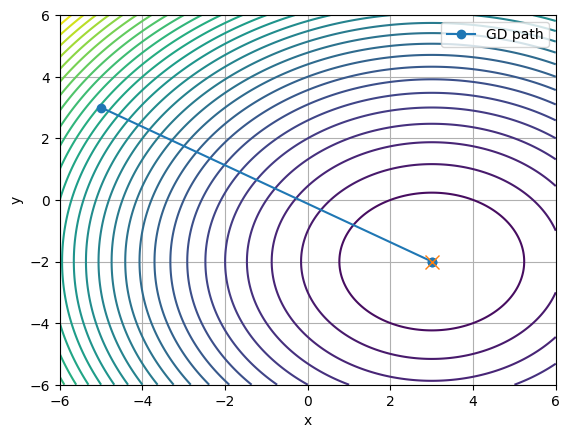

In [26]:
print_output([-5, 3], gd_tis, func_sp, grad_sp, [3, -2])

### Rotated elliptical function: $2(x + 2)^2 + 4xy + 3(y - 4)^2$

Method: [-30, 30]
Initial point: [-3, -25]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-18.000, 16.000)       -208.000      21            1495       0.000001  


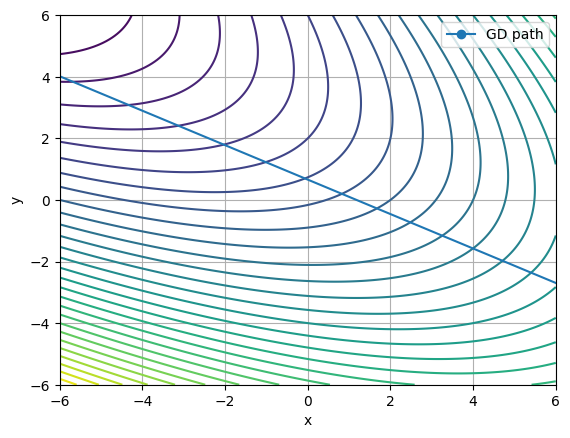

In [27]:
print_output([-3, -25], gd_tis, func_re, grad_re, [-18, 16], [-30, 30])

### Elliptical function with scale: $8(x - 3)^2 + (y + 1)^2$

Method: gd_tis
Initial point: [-5, 3]
Real minimum: (3.0, -2.0)
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (3.000, -1.000)       0.000         11            731        0.000000  


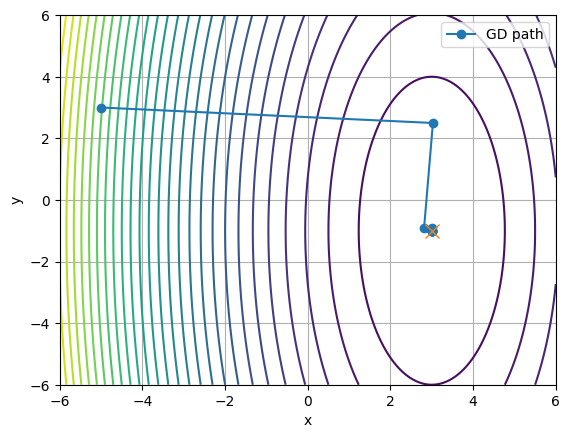

In [28]:
print_output([-5, 3], gd_tis, func_es, grad_es, [3, -1])